In [1]:
import matplotlib.pyplot as plt

In [2]:
wpn_range = 95
dmg = 110

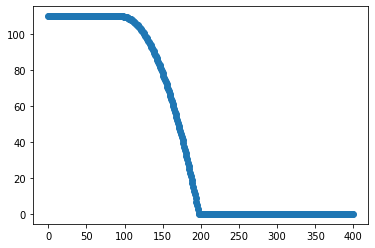

In [3]:
def new_calc_damage(distance):
    if distance <= wpn_range:
        return dmg
    else:
        return max(-(1 / wpn_range) * (distance - wpn_range) ** 2 + dmg, 0)

# def new_calc_damage(distance):
#     if distance <= self.effective_range:
#         return self.damage
#     else:
#         return max(-(1 / self.effective_range) * (distance - self.effective_range) ** 2 + self.damage, 0)
dmgs = []
for i in range(400):
    dmgs.append(new_calc_damage(i))

plt.scatter(range(400), dmgs)

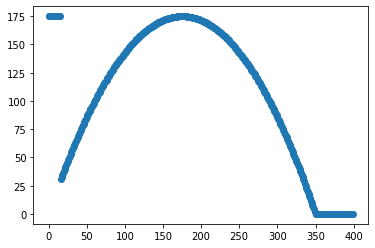

In [100]:
def old_calc_damage(distance):
    if distance <= wpn_range:
        return dmg
    else:
        return max(-(1 / dmg) * (distance - dmg) ** 2 + dmg, 0)

# def old_calc_damage(distance):
#     if distance <= self.effective_range:
#         return self.damage
#     else:
#         return max(-(1 / self.damage) * (distance - self.damage) ** 2 + self.damage, 0)
old_dmgs = []
for i in range(400):
    old_dmgs.append(old_calc_damage(i))
plt.scatter(range(400), old_dmgs)

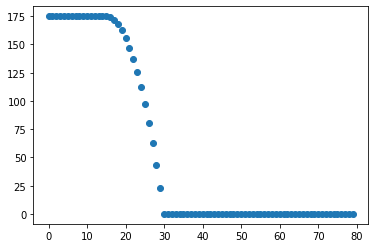

In [5]:
wpn_range = 15
dmg = 175
plot_range = wpn_range*2 + 50

def newest_calc_damage(distance):
    if distance <= wpn_range:
        return dmg
    else:
        return max(((-dmg/(wpn_range**2))*(distance**2) +
                 2*dmg/wpn_range*distance), 0)

newest_dmgs = []
for i in range(plot_range):
    newest_dmgs.append(newest_calc_damage(i))
plt.scatter(range(plot_range), newest_dmgs)

In [39]:
from environment.weapons import Weapon

winfield_stats=("Winfield M1873 Talon", 110, 95, 150, 16, 20)
romero_stats=("Romero", 200, 15, 54, 1, 12)
pax_stats=("Caldwell Pax", 110, 86, 31, 6, 12)
lebel_stats=("Lebel 1886", 132, 250, 54, 10, 5)
sparks_stats=("Sparks LRR", 149, 344, 54, 1, 16)
specter_stats=("Specter 1882 Bayonet", 175, 10, 168, 5, 10)

winfield = Weapon(*winfield_stats)
romero = Weapon(*romero_stats)
pax = Weapon(*pax_stats)
lebel = Weapon(*lebel_stats)
sparks = Weapon(*sparks_stats)
specter = Weapon(*specter_stats)

weapons = [((0,0), winfield), ((0,1), romero), ((0,2), pax), ((1,0), lebel), ((1,1), sparks), ((1,2), specter)]

damage_modifiers = {"leg": 0.3, "arm": 0.7, "torso": 1, "head": 2}

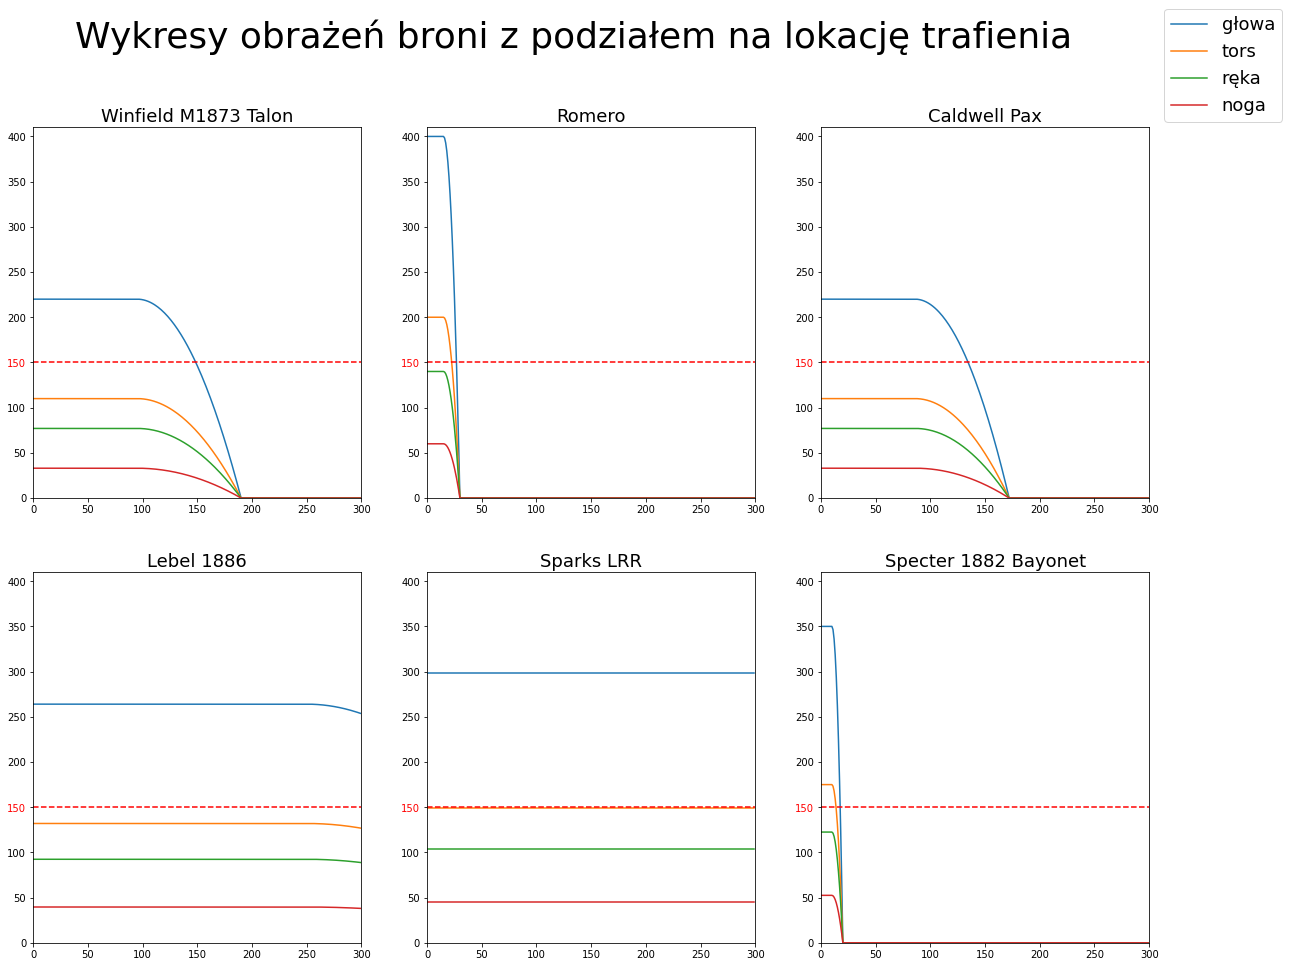

In [104]:
figure, axis = plt.subplots(2, 3, figsize=(20, 15))
figure.suptitle("Wykresy obrażeń broni z podziałem na lokację trafienia", fontsize = 36)

for wep_loc, weapon in weapons:
    weapon.ammo_loaded = 10_000
    leg_dmg = []
    arm_dmg = []
    torso_dmg = [] 
    head_dmg = []
    plot_range = 300
    for i in range(plot_range):
        raw_dmg = weapon.deal_damage(i)

        leg_dmg.append(raw_dmg*0.3)
        arm_dmg.append(raw_dmg*0.7)
        torso_dmg.append(raw_dmg)
        head_dmg.append(raw_dmg*2)

    axis[wep_loc].set_xlim([0, 300])
    axis[wep_loc].set_ylim([0, 410])
    axis[wep_loc].get_yticklabels()[3].set_color("red")
    axis[wep_loc].plot(range(plot_range), head_dmg)
    axis[wep_loc].plot(range(plot_range), torso_dmg)
    axis[wep_loc].plot(range(plot_range), arm_dmg)
    axis[wep_loc].plot(range(plot_range), leg_dmg)
    axis[wep_loc].plot([0, 300], [150, 150], linestyle="--", color="red")
    # axis[wep_loc].legend(["leg", "arm", "torso", "head"])
    axis[wep_loc].set_title(weapon.name, fontsize=18)
handles, _ = plt.gca().get_legend_handles_labels()
figure.legend(["głowa", "tors", "ręka", "noga"], prop={'size': 18})

In [7]:
import pandas as pd
import seaborn as sns

In [2]:
learning_data = pd.read_csv("C:/Users/Jacek/ray_results/PPOTrainer_HuntEnv_2022-05-24_22-38-26_np5lfmj/progress.csv")
learning_data

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,timesteps_this_iter,agent_timesteps_total,done,...,info/learner/default_policy/train,info/learner/default_policy/learner_stats/cur_kl_coeff,info/learner/default_policy/learner_stats/cur_lr,info/learner/default_policy/learner_stats/total_loss,info/learner/default_policy/learner_stats/policy_loss,info/learner/default_policy/learner_stats/vf_loss,info/learner/default_policy/learner_stats/vf_explained_var,info/learner/default_policy/learner_stats/kl,info/learner/default_policy/learner_stats/entropy,info/learner/default_policy/learner_stats/entropy_coeff
0,1.865916,1.333626,1.626900,1.0,128,1,128,128,128,False,...,NaN,0.2,0.00005,2.277298,-0.097383,2.364757,-0.000582,0.049620,16.702589,0.0
1,1.871247,1.282929,1.640978,1.0,128,1,256,128,256,False,...,NaN,0.2,0.00005,1.663615,-0.078146,1.732958,-0.007141,0.044021,16.605366,0.0
2,1.971867,1.389170,1.649627,1.0,128,1,384,128,384,False,...,NaN,0.2,0.00005,0.910621,-0.067265,0.969055,-0.015694,0.044159,16.236752,0.0
3,1.965706,1.321718,1.671055,1.0,128,1,512,128,512,False,...,NaN,0.2,0.00005,0.327239,-0.094819,0.408795,0.003977,0.066312,16.029120,0.0
4,1.890228,1.306330,1.658768,1.0,128,1,640,128,640,False,...,NaN,0.2,0.00005,0.042647,-0.081561,0.112789,-0.012020,0.057100,15.558029,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2.153464,1.895801,2.046257,1.0,128,1,26496,128,26496,False,...,NaN,0.2,0.00005,-0.060361,-0.077221,0.001153,0.002786,0.078531,-9.752035,0.0
207,2.171566,1.985562,2.053866,1.0,128,1,26624,128,26624,False,...,NaN,0.2,0.00005,-0.056673,-0.078259,0.001074,-0.076048,0.102556,-9.370713,0.0
208,2.137565,1.960419,2.051929,1.0,128,1,26752,128,26752,False,...,NaN,0.2,0.00005,-0.043477,-0.060045,0.000904,-0.017260,0.078317,-9.098731,0.0
209,2.176035,1.960419,2.049055,1.0,128,1,26880,128,26880,False,...,NaN,0.2,0.00005,-0.058135,-0.077357,0.001358,-0.076222,0.089325,-8.869405,0.0


In [3]:
learning_data.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'timesteps_this_iter', 'agent_timesteps_total',
       'done', 'episodes_total', 'training_iteration', 'trial_id',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore',
       'hist_stats/episode_reward', 'hist_stats/episode_lengths',
       'sampler_perf/mean_raw_obs_processing_ms',
       'sampler_perf/mean_inference_ms',
       'sampler_perf/mean_action_processing_ms',
       'sampler_perf/mean_env_wait_ms', 'sampler_perf/mean_env_render_ms',
       'timers/sample_time_ms', 'timers/sample_throughput',
       'timers/load_time_ms', 'timers/load_throughput', 'timers/learn_time_ms',
       'timers/learn_throughput', 'timers/update_time_ms',
       'info/num_steps_sampled'

In [21]:
interesting_cols = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean', 'info/learner/default_policy/learner_stats/policy_loss', 'hist_stats/episode_reward']

In [24]:
plot_data = learning_data[interesting_cols]

In [25]:
plot_data

,episode_reward_max,episode_reward_min,episode_reward_mean,info/learner/default_policy/learner_stats/policy_loss,hist_stats/episode_reward
0,1.865916,1.333626,1.626900,-0.097383,"[1.5907808263207737, 1.761402544249477, 1.6374..."
1,1.871247,1.282929,1.640978,-0.078146,"[1.7277860158322107, 1.57337646224743, 1.59793..."
2,1.971867,1.389170,1.649627,-0.067265,"[1.547718569847058, 1.5810694769711162, 1.5385..."
3,1.965706,1.321718,1.671055,-0.094819,"[1.6895900719575432, 1.780701289136344, 1.5797..."
4,1.890228,1.306330,1.658768,-0.081561,"[1.6661586597798206, 1.6012151620311013, 1.475..."
...,...,...,...,...,...
206,2.153464,1.895801,2.046257,-0.077221,"[2.034126860694477, 2.0633349945948605, 2.0372..."
207,2.171566,1.985562,2.053866,-0.078259,"[2.018051283303138, 2.0819066649110765, 2.0341..."
208,2.137565,1.960419,2.051929,-0.060045,"[2.099350081532213, 2.034126860694477, 2.03722..."
209,2.176035,1.960419,2.049055,-0.077357,"[2.034126860694477, 2.034126860694477, 2.09100..."


<AxesSubplot:ylabel='episode_reward_max'>

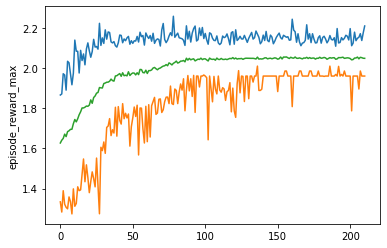

In [20]:
sns.lineplot(data=plot_data["episode_reward_max"])
sns.lineplot(data=plot_data["episode_reward_min"])
sns.lineplot(data=plot_data["episode_reward_mean"])


In [ ]:
sns.relplot(
    data=plot_data, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)